In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('car-mpg.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [4]:
df[df['hp'].str.isdigit() == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,0,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,1,amc concord dl


In [5]:
df['hp'].replace('?',np.nan,inplace=True)

In [6]:
df['hp'] = df['hp'].astype('float64')

In [7]:
df['hp'].fillna(df['hp'].median(), inplace=True)

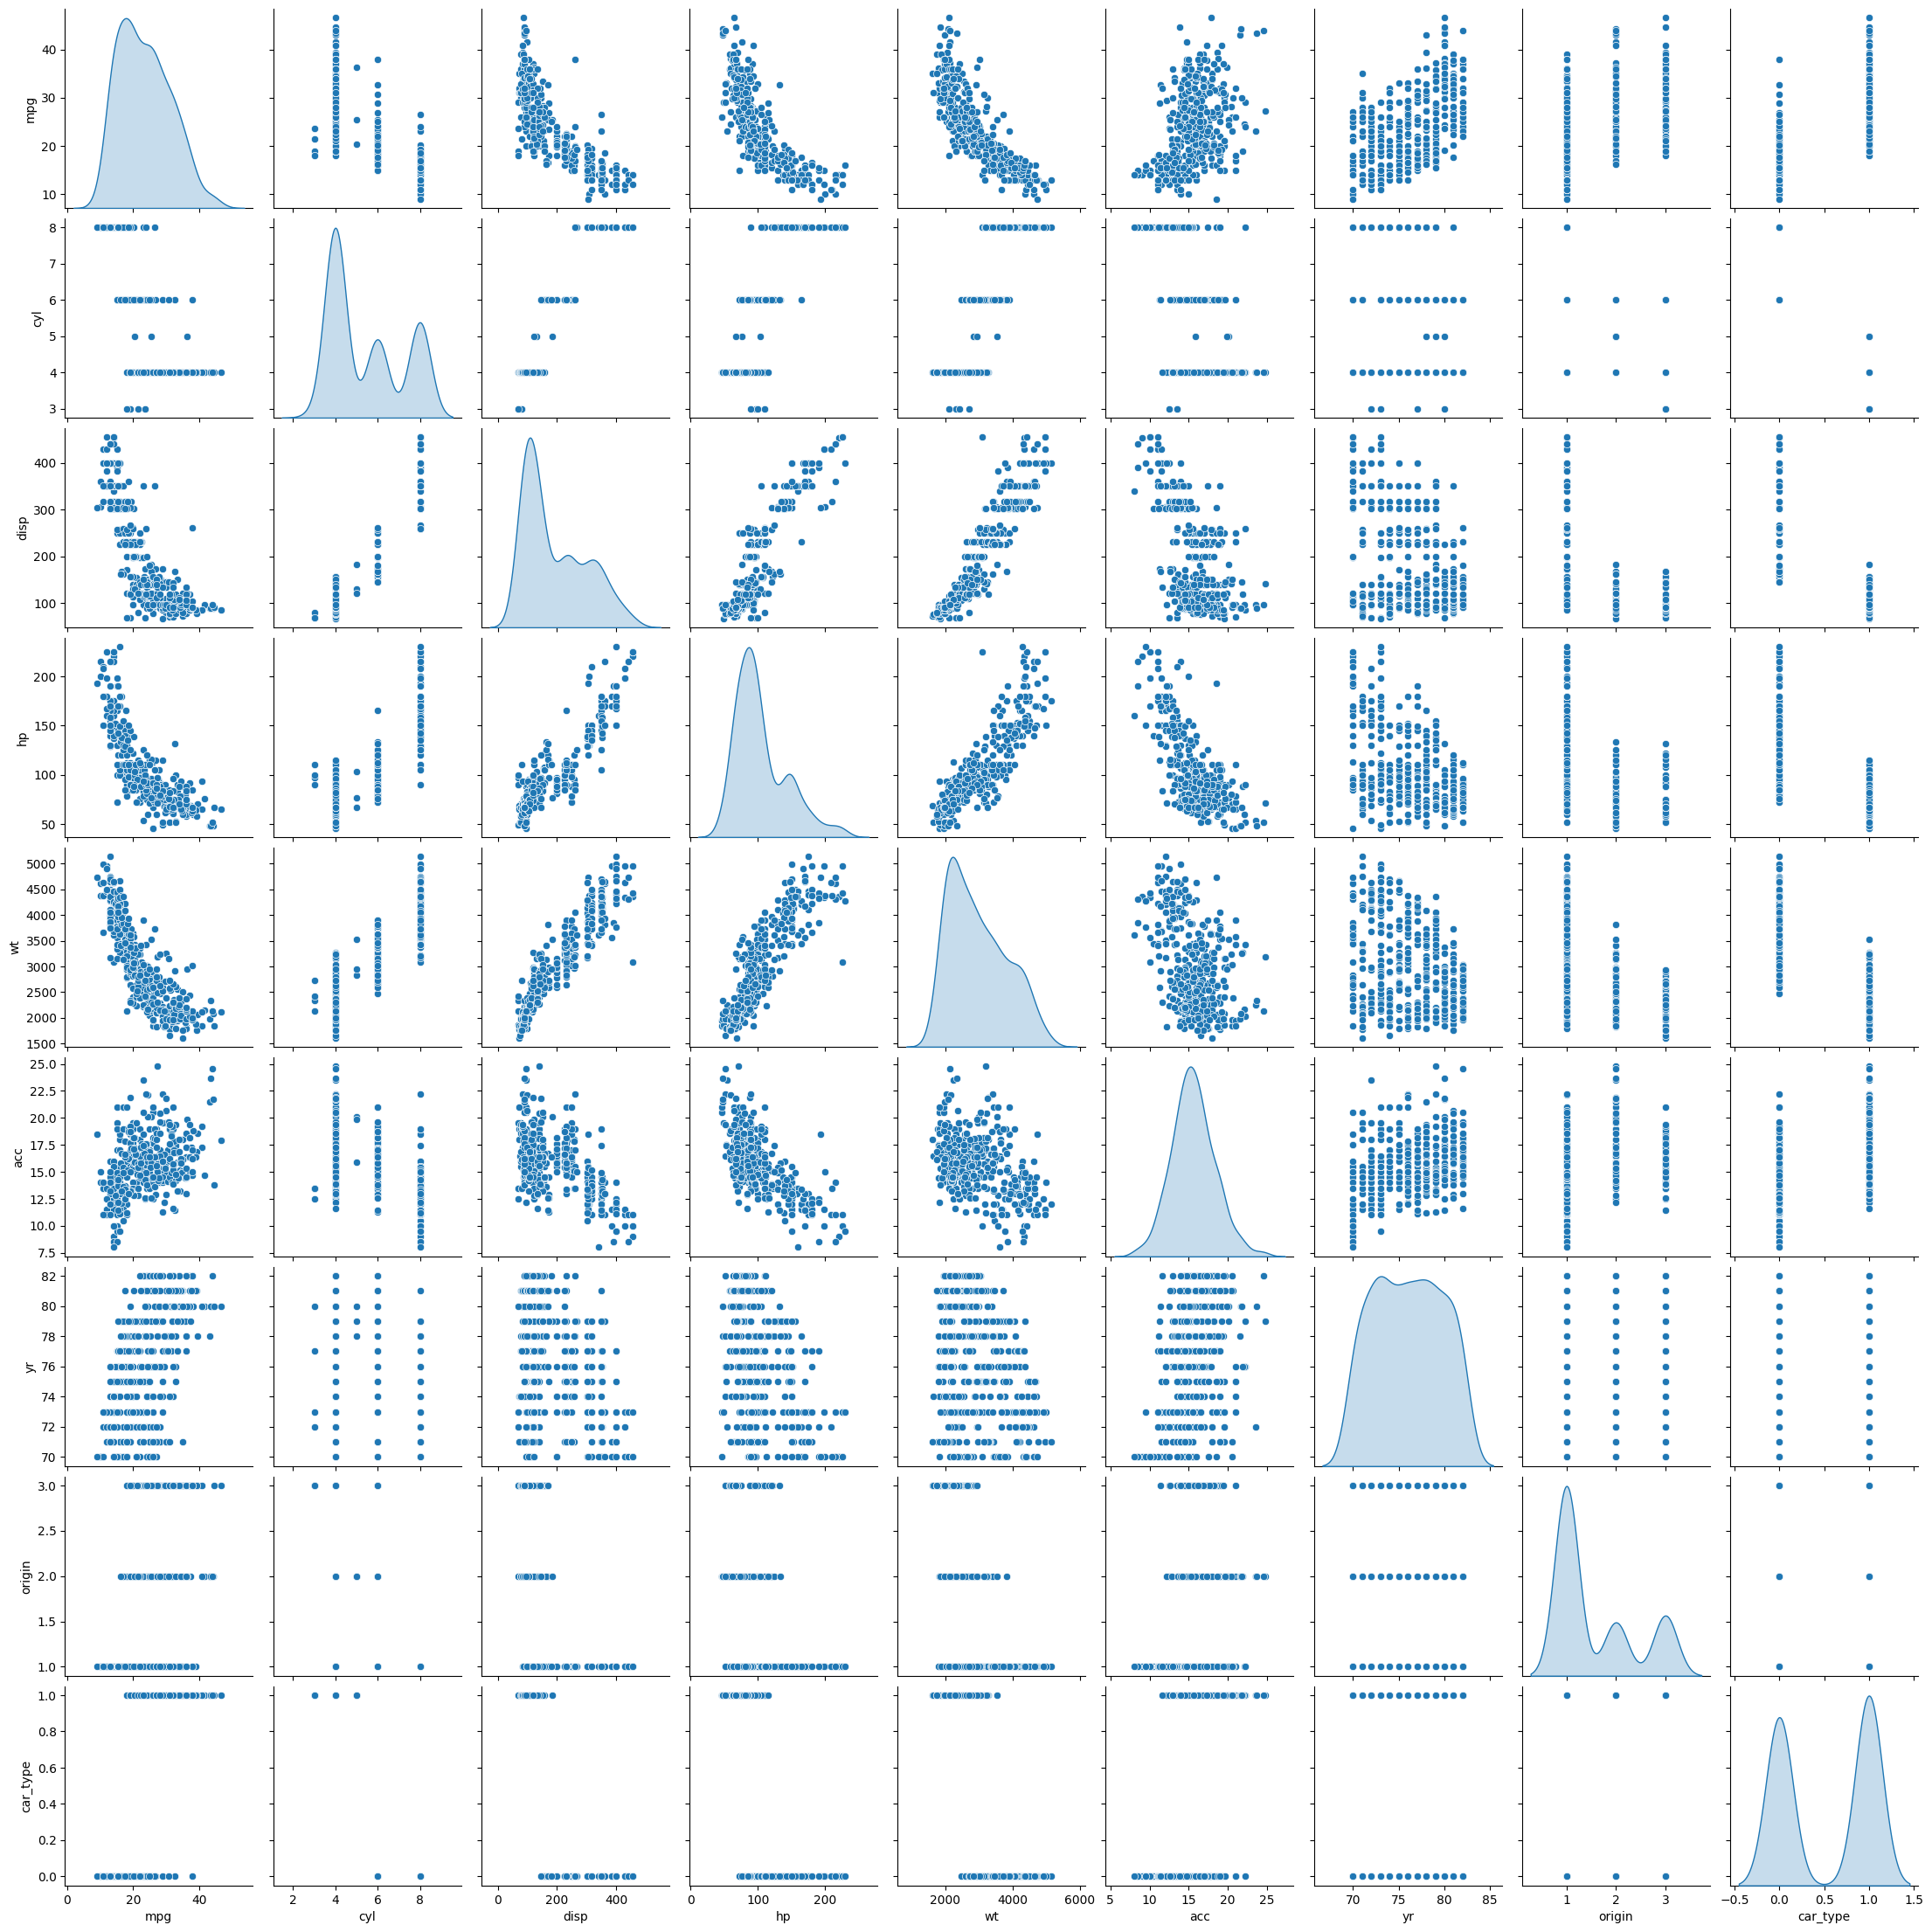

In [8]:
df = df.drop('car_name', axis=1)
sns.pairplot(df, diag_kind='kde')
plt.show()

In [9]:
from scipy.stats import zscore
df_z = df.apply(zscore)
cov_matrix = np.cov(df_z.T)
cov_matrix

array([[ 1.00251889, -0.77734942, -0.80622852, -0.77540145, -0.833836  ,
         0.42134757,  0.58072624,  0.56486963,  0.76111917],
       [-0.77734942,  1.00251889,  0.95311615,  0.84340357,  0.89827376,
        -0.50669259, -0.34962425, -0.56396033, -0.9148753 ],
       [-0.80622852,  0.95311615,  1.00251889,  0.89803457,  0.93517383,
        -0.54505356, -0.37109656, -0.61094444, -0.85729492],
       [-0.77540145,  0.84340357,  0.89803457,  1.00251889,  0.86461476,
        -0.68831918, -0.41477495, -0.45323458, -0.70316554],
       [-0.833836  ,  0.89827376,  0.93517383,  0.86461476,  1.00251889,
        -0.41850885, -0.30733654, -0.58248745, -0.81749949],
       [ 0.42134757, -0.50669259, -0.54505356, -0.68831918, -0.41850885,
         1.00251889,  0.28886274,  0.20639158,  0.386157  ],
       [ 0.58072624, -0.34962425, -0.37109656, -0.41477495, -0.30733654,
         0.28886274,  1.00251889,  0.18111726,  0.30596228],
       [ 0.56486963, -0.56396033, -0.61094444, -0.45323458, -0

In [10]:
df_z.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450,0.759207
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543,-0.912577
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409,-0.855141
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096,-0.701399
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024,-0.815445
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873,0.385187
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662,0.305194
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000,0.572691
car_type,0.759207,-0.912577,-0.855141,-0.701399,-0.815445,0.385187,0.305194,0.572691,1.000000


In [11]:
X = df[df.columns[1:]]    # remaining columns
y = df[df.columns[0]]     # mpg column

In [12]:
# We should always apply PCA on independent variables only
X_z = X.apply(zscore)
cov_matrix = np.cov(X_z.T)
cov_matrix

array([[ 1.00251889,  0.95311615,  0.84340357,  0.89827376, -0.50669259,
        -0.34962425, -0.56396033, -0.9148753 ],
       [ 0.95311615,  1.00251889,  0.89803457,  0.93517383, -0.54505356,
        -0.37109656, -0.61094444, -0.85729492],
       [ 0.84340357,  0.89803457,  1.00251889,  0.86461476, -0.68831918,
        -0.41477495, -0.45323458, -0.70316554],
       [ 0.89827376,  0.93517383,  0.86461476,  1.00251889, -0.41850885,
        -0.30733654, -0.58248745, -0.81749949],
       [-0.50669259, -0.54505356, -0.68831918, -0.41850885,  1.00251889,
         0.28886274,  0.20639158,  0.386157  ],
       [-0.34962425, -0.37109656, -0.41477495, -0.30733654,  0.28886274,
         1.00251889,  0.18111726,  0.30596228],
       [-0.56396033, -0.61094444, -0.45323458, -0.58248745,  0.20639158,
         0.18111726,  1.00251889,  0.574134  ],
       [-0.9148753 , -0.85729492, -0.70316554, -0.81749949,  0.386157  ,
         0.30596228,  0.574134  ,  1.00251889]])

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print()
print(eigenvectors)

[5.36154846 0.98268568 0.75355216 0.50823437 0.25713278 0.03085396
 0.06471669 0.06142704]

[[ 0.41449162  0.09356606 -0.0332179   0.22483956 -0.21450742 -0.60220965
   0.59880399  0.0234461 ]
 [ 0.42235576  0.06187586 -0.04032618  0.09684791  0.12835736  0.74797026
   0.45110563  0.16537793]
 [ 0.39744365 -0.20172205 -0.18376472  0.04303365  0.46457979 -0.06040034
  -0.13581577 -0.72649631]
 [ 0.40260479  0.15741564 -0.01696792  0.22498319  0.43399861 -0.19756493
  -0.45435481  0.57306139]
 [-0.26221017  0.5441256   0.53541792  0.45190768  0.2699598   0.02758899
   0.09073241 -0.24981681]
 [-0.19124988  0.60549598 -0.7689377   0.01510864  0.02758254  0.01418304
   0.01608912 -0.06390489]
 [-0.27875834 -0.46273794 -0.28487647  0.78545989 -0.03829693  0.06746746
   0.00618601  0.0633148 ]
 [-0.38304481 -0.21241671 -0.06419381 -0.25729801  0.67691656 -0.17230715
   0.45224306  0.21308012]]


In [14]:
eig_pairs = [(eigenvalues[i], eigenvectors[i,:]) for i in range(len(eigenvalues))]
eig_pairs

[(5.361548457253273,
  array([ 0.41449162,  0.09356606, -0.0332179 ,  0.22483956, -0.21450742,
         -0.60220965,  0.59880399,  0.0234461 ])),
 (0.9826856840544212,
  array([ 0.42235576,  0.06187586, -0.04032618,  0.09684791,  0.12835736,
          0.74797026,  0.45110563,  0.16537793])),
 (0.7535521581523296,
  array([ 0.39744365, -0.20172205, -0.18376472,  0.04303365,  0.46457979,
         -0.06040034, -0.13581577, -0.72649631])),
 (0.5082343727181992,
  array([ 0.40260479,  0.15741564, -0.01696792,  0.22498319,  0.43399861,
         -0.19756493, -0.45435481,  0.57306139])),
 (0.25713277682647506,
  array([-0.26221017,  0.5441256 ,  0.53541792,  0.45190768,  0.2699598 ,
          0.02758899,  0.09073241, -0.24981681])),
 (0.030853962893905882,
  array([-0.19124988,  0.60549598, -0.7689377 ,  0.01510864,  0.02758254,
          0.01418304,  0.01608912, -0.06390489])),
 (0.06471668637389195,
  array([-0.27875834, -0.46273794, -0.28487647,  0.78545989, -0.03829693,
          0.0674674

In [15]:
eig_pairs.sort(reverse=True)
eig_pairs

[(5.361548457253273,
  array([ 0.41449162,  0.09356606, -0.0332179 ,  0.22483956, -0.21450742,
         -0.60220965,  0.59880399,  0.0234461 ])),
 (0.9826856840544212,
  array([ 0.42235576,  0.06187586, -0.04032618,  0.09684791,  0.12835736,
          0.74797026,  0.45110563,  0.16537793])),
 (0.7535521581523296,
  array([ 0.39744365, -0.20172205, -0.18376472,  0.04303365,  0.46457979,
         -0.06040034, -0.13581577, -0.72649631])),
 (0.5082343727181992,
  array([ 0.40260479,  0.15741564, -0.01696792,  0.22498319,  0.43399861,
         -0.19756493, -0.45435481,  0.57306139])),
 (0.25713277682647506,
  array([-0.26221017,  0.5441256 ,  0.53541792,  0.45190768,  0.2699598 ,
          0.02758899,  0.09073241, -0.24981681])),
 (0.06471668637389195,
  array([-0.27875834, -0.46273794, -0.28487647,  0.78545989, -0.03829693,
          0.06746746,  0.00618601,  0.0633148 ])),
 (0.06142703522877005,
  array([-0.38304481, -0.21241671, -0.06419381, -0.25729801,  0.67691656,
         -0.17230715

In [16]:
total = sum(eigenvalues)
var_exp = [i/total for i in sorted(eigenvalues, reverse=True)]
var_cum_sum = np.cumsum(var_exp)
print(var_exp)
print(var_cum_sum)

[0.6685096537467173, 0.12252707806834329, 0.09395735137766165, 0.06336967524155934, 0.03206083932164276, 0.00806926020428238, 0.007659086993034452, 0.0038470550467589915]
[0.66850965 0.79103673 0.88499408 0.94836376 0.9804246  0.98849386
 0.99615294 1.        ]


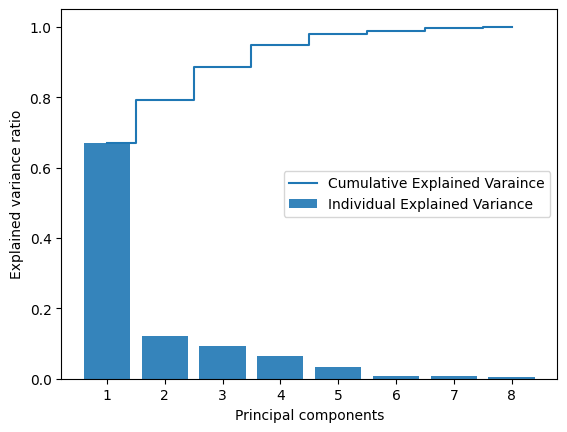

In [17]:
plt.bar(range(1,9), var_exp, align='center', alpha=0.9, label='Individual Explained Variance')
plt.step(range(1,9), var_cum_sum, where='mid', label='Cumulative Explained Varaince')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

Lets take only the first 4 Principal Components as remaining one's contribution is low

In [18]:
# P_reduce represents reduced mathematical space..
P_reduce = np.array(sorted(eigenvalues, reverse=True)[0:8])
X_z_4D = np.dot(X_z, P_reduce.T)
pd.DataFrame(X_z_4D)

,0
0,9.417065
1,10.580605
2,9.781435
3,9.740884
4,9.394190
...,...
393,-5.472015
394,-6.028605
395,-6.229563
396,-5.617990
